# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

__This data is about some movies and its properties like who is director? , when it released ? , how much its revenue and budget? and some others.This data set contains information about 10,000 movies collected from The Movie Database (TMDb)__

`Questions that we want to answer through the analysis we will do:`
1. Which genres are most popular from year to year?
2.  What kinds of properties are associated with movies that have high revenues?

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [155]:
df = pd.read_csv("C:\\Users\\Taha CompuTech\\Desktop\\udacity\\Advanced_Data_Analysis\\tmdb-movies.csv")

In [156]:
df.shape

(10866, 21)

In [157]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [158]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [159]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7813,22887,tt0914809,0.065543,6000,6000,Loose Change: Final Cut,NaN,NaN,Dylan Avery,NaN,...,Loose Change Final Cut is the third installmen...,129,Documentary,Louder Than Words,11/11/07,12,5.1,2007,6.310011e+03,6.310011e+03
5517,68727,tt1924429,1.114792,20000000,24261569,Trance,James McAvoy|Vincent Cassel|Rosario Dawson|Mat...,NaN,Danny Boyle,Don't be a hero.,...,"A fine art auctioneer mixed up with a gang, jo...",101,Thriller|Crime|Drama|Mystery,Cloud Eight Films|PathÃ©|Decibel Films|Film4,3/27/13,666,6.4,2013,1.872067e+07,2.270964e+07
1048,276488,tt3148348,0.277049,0,0,Let Us Prey,Liam Cunningham|Niall Greig Fulton|Pollyanna M...,NaN,Brian O'Malley,Darkness Shall Rise,...,"Rachel, a rookie cop, is about to begin her fi...",88,Horror,Makar Productions|Fantastic Films|Greenhouse M...,4/17/14,44,5.4,2014,0.000000e+00,0.000000e+00
4612,95755,tt1272886,0.401012,2000000,0,Small Apartments,Matt Lucas|Juno Temple|James Caan|Dolph Lundgr...,NaN,Jonas Ã…kerlund,NaN,...,When a clumsy deadbeat accidentally kills his ...,96,Comedy|Crime,Deviant Films|Morocco Junction Pictures|1812 P...,3/10/12,24,5.1,2012,1.899489e+06,0.000000e+00
9009,8741,tt0120863,0.992143,52000000,98126565,The Thin Red Line,Sean Penn|Adrien Brody|Jim Caviezel|Ben Chapli...,NaN,Terrence Malick,Every man fights his own war.,...,"Based on the graphic novel by James Jones, The...",170,Drama|History|War,Fox 2000 Pictures|Phoenix Pictures|Geisler-Rob...,12/25/98,413,6.8,1998,6.956016e+07,1.312635e+08


In [160]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [162]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


#### Define
- Now preparing a function to dropped all columns that we do not need in our analysis

#### Code

In [163]:
# This Function takes a column label and it work is drop this column from the data
def drop_columns(column_label):
    df.drop(labels = column_label, axis= 1, inplace=True)

In [164]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [165]:
df.shape

(10866, 21)

In [166]:
dropped_labels= ['id','imdb_id','budget','revenue','homepage','tagline','keywords','overview','runtime','release_date']
for label in dropped_labels:
    drop_columns(label)

#### test

In [167]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [168]:
df.shape

(10866, 11)

#### Define 
- I will rename `budget_adj` and `revenue_adj` columns to be more clear for readers

#### Code

In [169]:
df = df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'})

#### test

In [170]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'budget', 'revenue'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget                10866 non-null  float64
 10  revenue               10866 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 933.9+ KB


In [172]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Text(0.5, 1.0, 'Correlation')

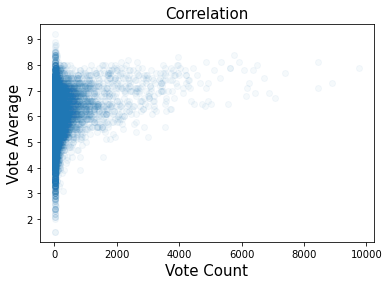

In [174]:
# Let's make some visualizations to show the correlations with scatter diagrams
plt.scatter(df.vote_count, df.vote_average, alpha=0.045)
plt.xlabel('Vote Count', fontsize=15)
plt.ylabel('Vote Average', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote counts and vote average is week**

Text(0.5, 1.0, 'Correlation')

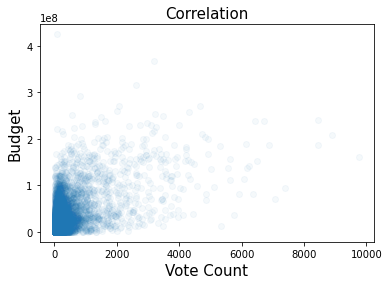

In [175]:
plt.scatter(df.vote_count, df.budget, alpha=0.045)
plt.xlabel('Vote Count', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote counts and Budget is Strong positive**

Text(0.5, 1.0, 'Correlation')

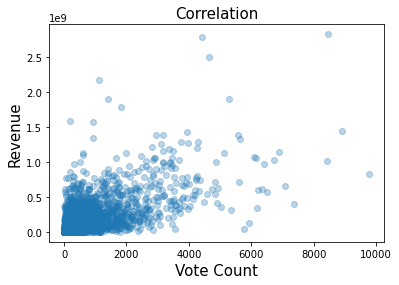

In [176]:
plt.scatter(df.vote_count, df.revenue, alpha=0.3)
plt.xlabel('Vote Count', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote counts and Budget is Strong positive**

Text(0.5, 1.0, 'Correlation')

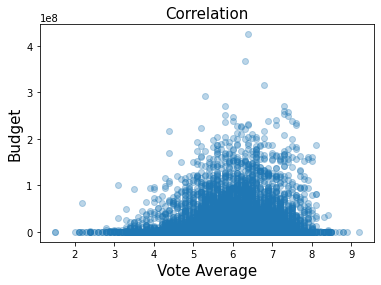

In [177]:
plt.scatter(df.vote_average, df.budget, alpha=0.3)
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote Average and Budget is week**

Text(0.5, 1.0, 'Correlation')

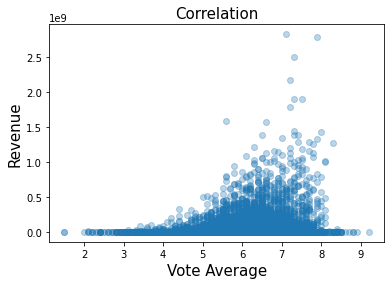

In [178]:
plt.scatter(df.vote_average, df.revenue, alpha=0.3)
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote Average and Budget is week**

#### Define
- So i will drop this column to avoid any misleading

#### Code

In [179]:
df.drop(labels='vote_average', axis=1, inplace=True)

#### test

In [180]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'genres',
       'production_companies', 'vote_count', 'release_year', 'budget',
       'revenue'],
      dtype='object')

In [181]:
df.shape

(10866, 10)

Text(0.5, 1.0, 'Correlation')

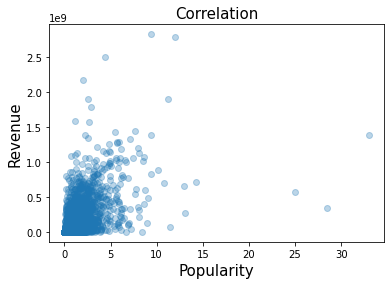

In [182]:
plt.scatter(df.popularity, df.revenue, alpha=0.3)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title("Correlation", fontsize=15)

**As shown above the correlation between vote counts and Budget is Strong positive**

In [183]:
p_compines_counts = df.production_companies.value_counts()

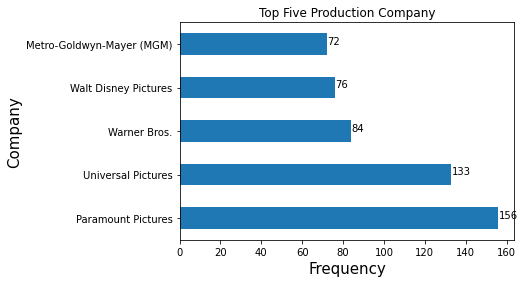

In [184]:
p_compines_counts.head().plot(kind='barh')
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Company", fontsize=15)
plt.title("Top Five Production Company")
for index, value in enumerate(p_compines_counts.head()):
  plt.text(value, index, str(value))

In [185]:
genres_counts = df.genres.value_counts()


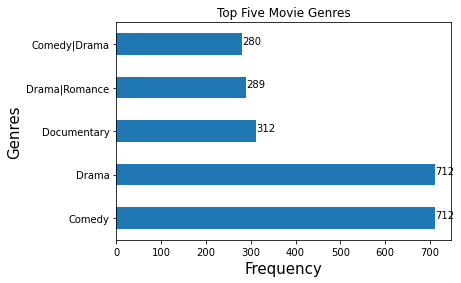

In [186]:
genres_counts.head().plot(kind='barh')
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Genres", fontsize=15)
plt.title("Top Five Movie Genres")
for index, value in enumerate(genres_counts.head()):
  plt.text(value, index, str(value))

Text(0.5, 1.0, 'Top Five Vote Count Movies')

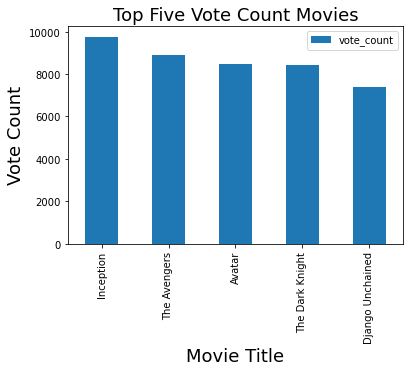

In [187]:
df.sort_values(by = 'vote_count', ascending=False).head().plot(x='original_title', y='vote_count', kind='bar')
plt.xlabel("Movie Title", fontsize=18)
plt.ylabel("Vote Count", fontsize=18)
plt.title('Top Five Vote Count Movies', fontsize=18)

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>, <AxesSubplot:>]],
      dtype=object)

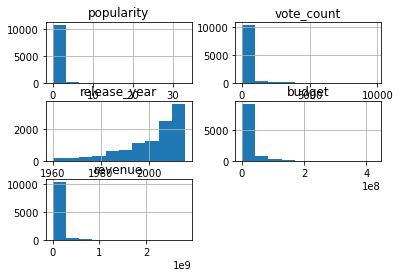

In [188]:
#Let's show some histograms to know the skweedness of our data
df.hist()

Text(0.5, 1.0, "Top Five Movie's Revenue")

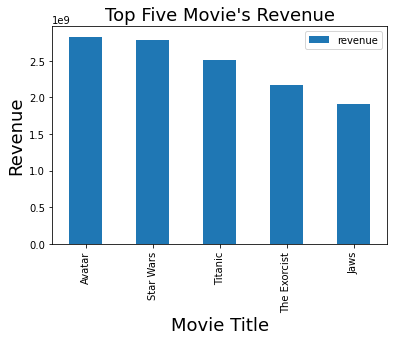

In [189]:
df.sort_values(by = 'revenue', ascending=False).head().plot(x='original_title', y='revenue', kind='bar')
plt.xlabel("Movie Title", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.title('Top Five Movie\'s Revenue', fontsize=18)

Text(0.5, 1.0, "Top Five Movie's Director with highest Revenue")

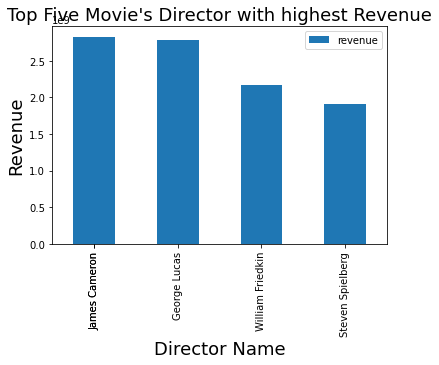

In [67]:
df.sort_values(by = 'revenue', ascending=False).head().plot(x='director', y='revenue', kind='bar')
plt.xlabel("Director Name", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.title('Top Five Movie\'s Director with highest Revenue', fontsize=18)

### Now these all the useful insights i got from my EDA on TMDB data:

**The most five production companies are:**
- 1) Paramount Pictures
- 2) Universal Pictures
- 3) Warnor Bros
- 4) Walt Disney Pictures
- 5) Metro-Goldwyn-Mayar (MGM)

**The top five movies genres are:**
- 1) Comedy 
- 2) Drama
- 3) Documentry
- 4) Drama | Romance  
- 5) Comedy | Drama

**The highest vote count due to those movies:**
- 1) Inception 
- 2) The Avengers
- 3) Avatar
- 4) The Dark Knight  
- 5) Django Unchained

**The highest revenue due to those movies:**
- 1) Avatar 
- 2) Star Wars
- 3) Titanic
- 4) The Exorcist  
- 5) Jaws

**The highest revenue due to those directors:**
- 1) James Cameron 
- 2) George Lucas
- 3) William Friedkin
- 4) Steven Spielberg  

### Conclusion

- In the first i take a quick look at the data and noticed that there are some columns i will not need them in my analysis and i check the correlations between features to confirm that.
- I rename two columns to become more clear.
- I check the five summary statistics by using `df.describe()` method to see if there are any outliers or something not true.
- Then i start with visualization specially (Scatter Plot) to see more details about correlations and how their are.
- Finally i used histograms to get my useful insights that i mentioned above like which production companies produced more movies and who are directors have most revenue of their movies.

### Limitaions:
- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.